In [60]:
import pandas as pd
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
from statsmodels.formula.api import ols
import seaborn as sns

file_path = '/Users/rebeccluo/Downloads/US_Paid_leave_analysis.dta'

# Load the file into a DataFrame
df = pd.read_stata(file_path)
# Load the Stata file into a DataFrame


# Display the first few rows of the DataFrame
birxpos_vars = [f'_IBirXpos_{i}_1' for i in range(2, 52)]  # Event-study dummies _IBirXpos_2_1 to _IBirXpos_50_1
llbirth_vars = [f'_LlBirth_{2}_1'] + [f'_LlBirth_{i}_1' for i in range(8, 51)]   # Reference period dummies from _LlBirth_8 to _LlBirth_50
llbipos_vars = [f'_LlBiXpos_{2}_1'] + [f'_LlBiXpos_{i}_1' for i in range(8, 51)]  # Include _LlBiXpos_2_1 and _LlBiXpos_8_1 to _LlBiXpos_50_1  # Event-study reference period _LlBiXpos_8_1 to _LlBiXpos_50_1




In [61]:
state_ca = 'California'
state_nj = 'New Jersey'
df_filtered = df[(df['state'].isin([state_ca, state_nj]))].copy()

# Create a new column for pre/post policy
df_filtered['policy_period'] = df_filtered['post_policy'].map({0: 'Pre-policy', 1: 'Post-policy'})

# Create a summary table only for CA and NJ
summary_table = df_filtered.groupby(['state', 'policy_period']).agg(
    Mean_of_rm_lfp=('rm_lfp', 'mean'),
    Std_Dev_of_rm_lfp=('rm_lfp', 'std'),
    Count_of_Observations=('rm_lfp', 'count'),
    Average_Age=('tage', lambda x: round(x.mean())),  # Round average age to no decimals
    Median_Age=('tage', lambda x: round(x.median())),  # Round median age to no decimals
    Std_Dev_Age=('tage', 'std')  # Standard deviation of age
).reset_index()

# Filter out any rows where the state is not CA or NJ
summary_table = summary_table[summary_table['state'].isin([state_ca, state_nj])]

# Reformatting the summary table for clarity
summary_table = summary_table.rename(columns={
    'Mean_of_rm_lfp': 'Mean of rm_lfp',
    'Std_Dev_of_rm_lfp': 'Standard Deviation of rm_lfp',
    'Count_of_Observations': 'Count of Observations',
    'Average_Age': 'Average Age',
    'Median_Age': 'Median Age',
    'Std_Dev_Age': 'Standard Deviation of Age'
})

# Display the summary statistics
print(summary_table)

        state policy_period  Mean of rm_lfp  Standard Deviation of rm_lfp  \
0  California   Post-policy        0.629051                      0.483075   
1  California    Pre-policy        0.610805                      0.487579   
4  New Jersey   Post-policy        0.758213                      0.428307   
5  New Jersey    Pre-policy        0.602689                      0.489372   

   Count of Observations  Average Age  Median Age  Standard Deviation of Age  
0                  14905         32.0        31.0                   5.009296  
1                  21989         32.0        31.0                   4.929428  
4                   1522         32.0        32.0                   4.734293  
5                   7883         32.0        32.0                   4.170334  


/var/folders/nk/v5qz7_1x3hb9nxp2rz8sq6800000gn/T/ipykernel_90132/658934232.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_table = df_filtered.groupby(['state', 'policy_period']).agg(


Pattern of LFP around birth for mothers giving birth in CA and NJ before and after paid leave mandates 


In [62]:
state_ca = 'California'
state_nj = 'New Jersey'
df_filtered = df[(df['state'].isin([state_ca, state_nj]))]

# Define birth dummy variables
birth_vars = ' + '.join([f'_IBirth_{i}' for i in range(2, 52)])  # _IBirth_2 to _IBirth_51

formula = f'rm_lfp ~ {birth_vars}'

# Filter data for post_policy == 1 and states CA or NJ
df_no_policy_no_recession = df[(df['post_policy'] == 0) & 
                                ((df['state'] == state_ca) | (df['state'] == state_nj)) & 
                                (df['recession_birth'] == 0)]
df_no_policy_recession = df[(df['post_policy'] == 0) & ((df['state'] == state_ca) | (df['state'] == state_nj) & df['recession_birth']==1)]
df_policy_no_recession = df[(df['post_policy'] == 1) & ((df['state'] == state_ca) | (df['state'] == state_nj) & df['recession_birth']==0)]
df_policy_recession = df[(df['post_policy'] == 1) & ((df['state'] == state_ca) | (df['state'] == state_nj) & df['recession_birth']==1)]

No Policy and No Recession Regression Results with Weights:
                            WLS Regression Results                            
Dep. Variable:                 rm_lfp   R-squared:                       0.030
Model:                            WLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     2.962
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           2.92e-10
Time:                        14:57:04   Log-Likelihood:                -18486.
No. Observations:               25151   AIC:                         3.707e+04
Df Residuals:                   25100   BIC:                         3.749e+04
Df Model:                          50                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------

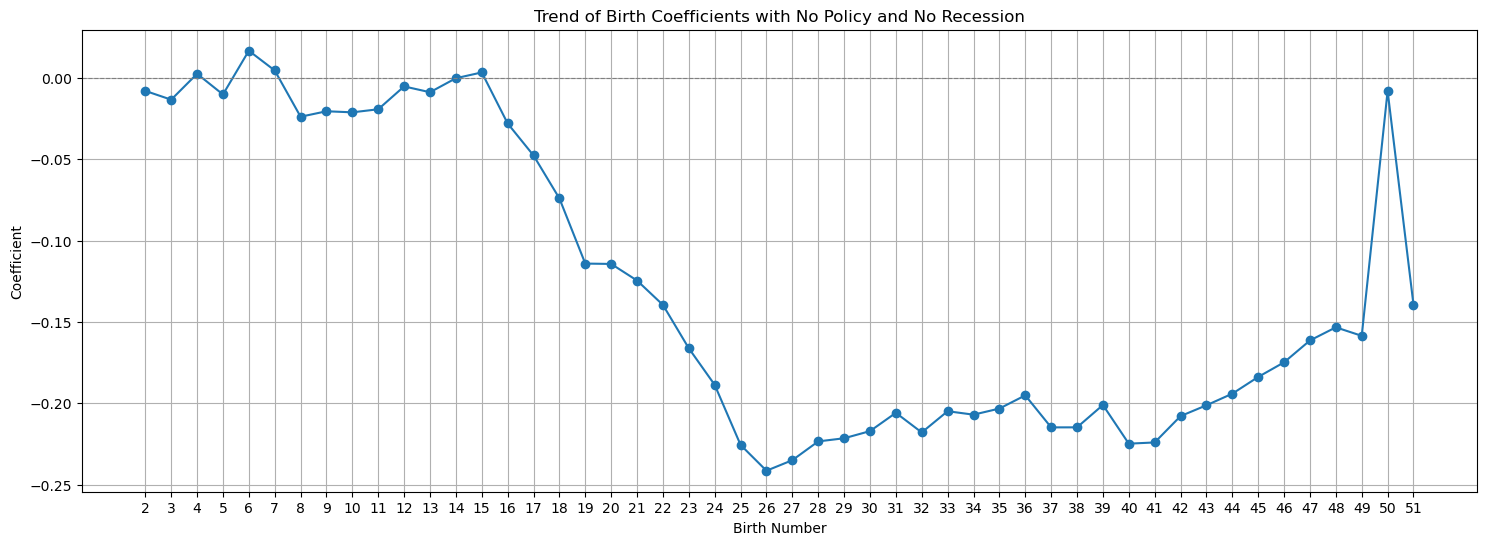

No Policy with Recession Regression Results with Weights:
                            WLS Regression Results                            
Dep. Variable:                 rm_lfp   R-squared:                       0.025
Model:                            WLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     3.303
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           2.62e-12
Time:                        14:57:05   Log-Likelihood:                -17538.
No. Observations:               23927   AIC:                         3.518e+04
Df Residuals:                   23876   BIC:                         3.559e+04
Df Model:                          50                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------

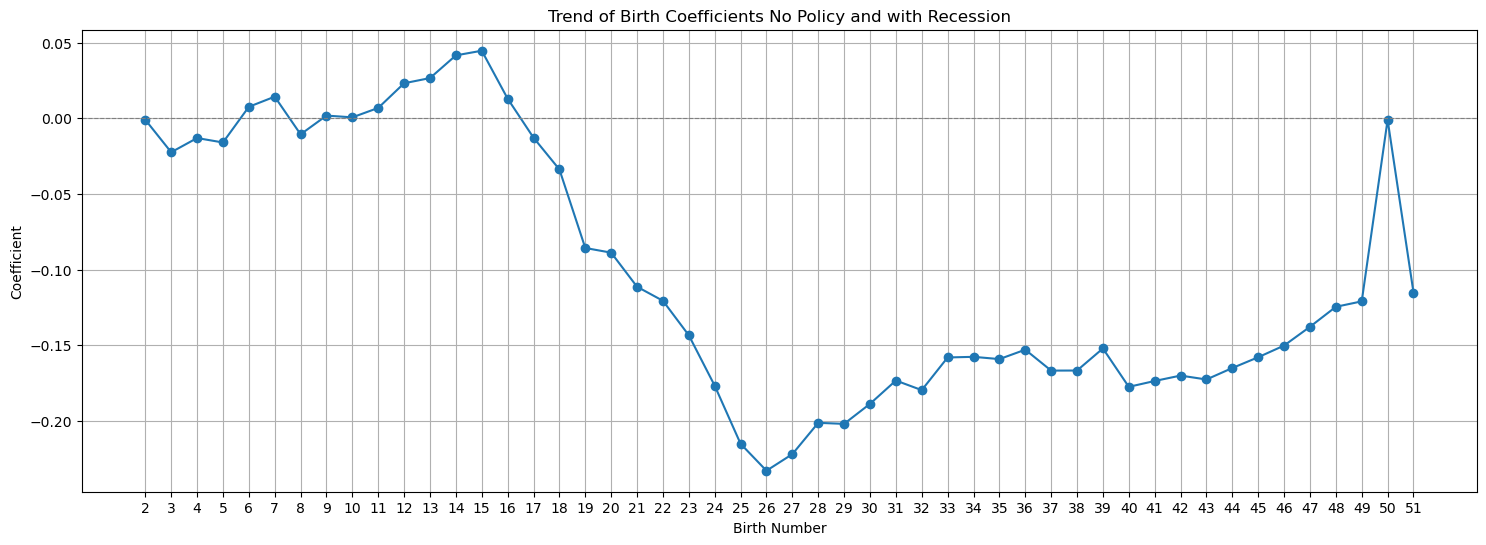

Policy with No Recession Regression Results with Weights:
                            WLS Regression Results                            
Dep. Variable:                 rm_lfp   R-squared:                       0.024
Model:                            WLS   Adj. R-squared:                 -0.019
Method:                 Least Squares   F-statistic:                 5.823e+09
Date:                Sat, 19 Oct 2024   Prob (F-statistic):          2.59e-139
Time:                        14:57:06   Log-Likelihood:                -663.80
No. Observations:                1146   AIC:                             1428.
Df Residuals:                    1096   BIC:                             1680.
Df Model:                          49                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------

/Users/rebeccluo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 50, but rank is 30
  warnings.warn('covariance of constraints does not have full '


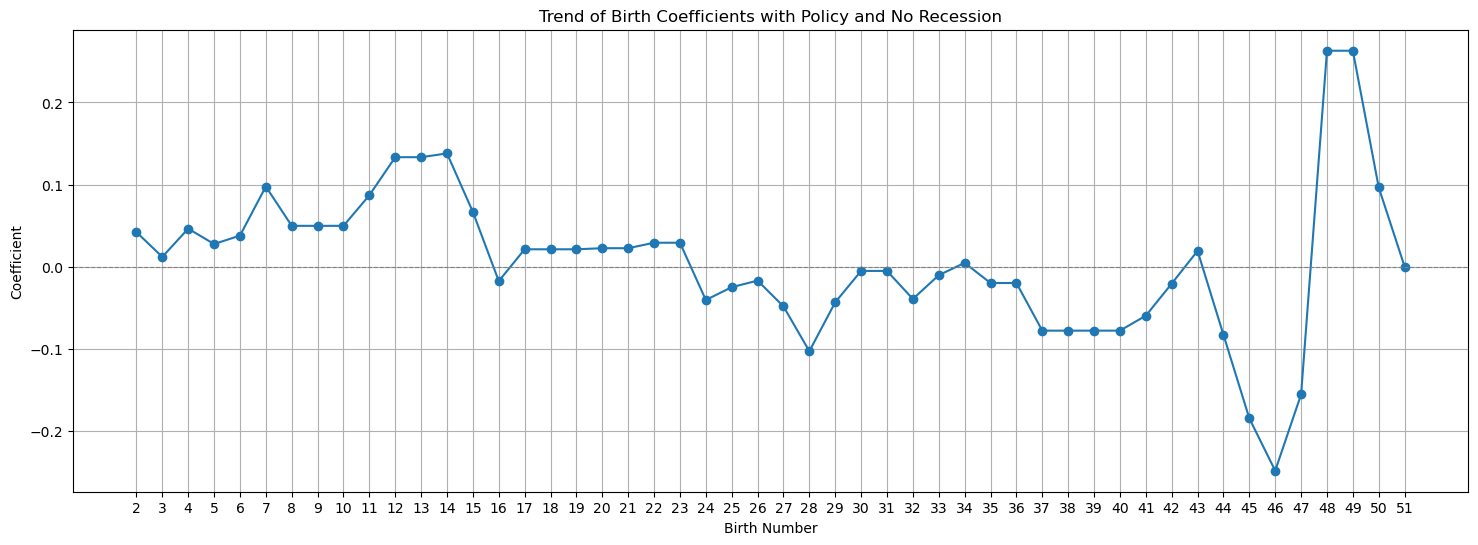

Policy with Recession Regression Results with Weights:
                            WLS Regression Results                            
Dep. Variable:                 rm_lfp   R-squared:                       0.037
Model:                            WLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     2.511
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           3.90e-07
Time:                        14:57:06   Log-Likelihood:                -11014.
No. Observations:               15281   AIC:                         2.213e+04
Df Residuals:                   15230   BIC:                         2.252e+04
Df Model:                          50                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------

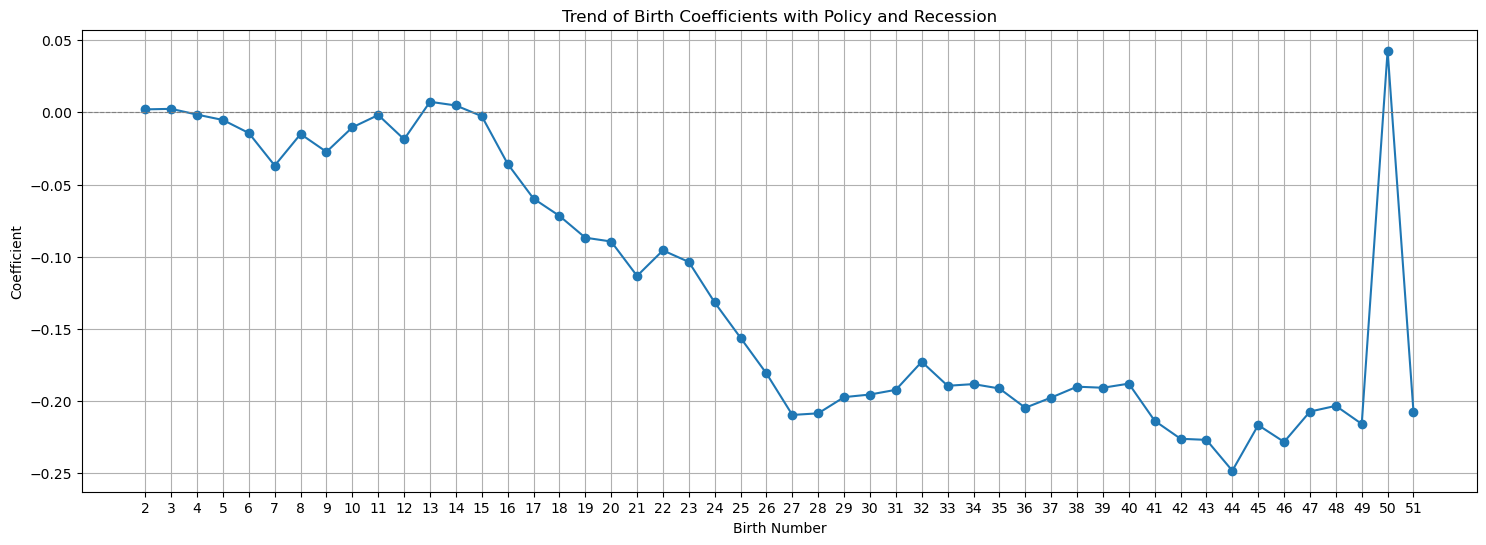

In [63]:
model_no_policy_no_recession = smf.wls(formula, data=df_no_policy_no_recession, weights=df_no_policy_no_recession['end_weight']).fit(cov_type='cluster', 
                                                                                                             cov_kwds={'groups': df_no_policy_no_recession['sippid']})
print("\
No Policy and No Recession Regression Results with Weights:")
print(model_no_policy_no_recession.summary())


birth_coefs = model_no_policy_no_recession.params.filter(like='_IBirth_')

# Create a DataFrame for easier plotting
birth_coefs_df = pd.DataFrame(birth_coefs).reset_index()
birth_coefs_df.columns = ['Birth Variable', 'Coefficient']

# Extract birth number from the variable name for plotting
birth_coefs_df['Birth Number'] = birth_coefs_df['Birth Variable'].str.extract('(\d+)').astype(int)

# Sort the DataFrame by Birth Number
birth_coefs_df = birth_coefs_df.sort_values(by='Birth Number')

# Plotting
plt.figure(figsize=(18, 6))
plt.plot(birth_coefs_df['Birth Number'], birth_coefs_df['Coefficient'], marker='o')
plt.title('Trend of Birth Coefficients with No Policy and No Recession')
plt.xlabel('Birth Number')
plt.ylabel('Coefficient')
plt.axhline(0, color='grey', linewidth=0.8, linestyle='--')  # Add a line at y=0
plt.grid()
plt.xticks(birth_coefs_df['Birth Number'])  # Set x-ticks to be the birth numbers
plt.show()



model_no_policy_recession = smf.wls(formula, data=df_no_policy_recession, weights=df_no_policy_recession['end_weight']).fit(cov_type='cluster', 
                                                                                                                            cov_kwds={'groups': df_no_policy_recession['sippid']})

print("\
No Policy with Recession Regression Results with Weights:")
print(model_no_policy_recession.summary())

birth_coefs = model_no_policy_recession.params.filter(like='_IBirth_')

# Create a DataFrame for easier plotting
birth_coefs_df = pd.DataFrame(birth_coefs).reset_index()
birth_coefs_df.columns = ['Birth Variable', 'Coefficient']

# Extract birth number from the variable name for plotting
birth_coefs_df['Birth Number'] = birth_coefs_df['Birth Variable'].str.extract('(\d+)').astype(int)

# Sort the DataFrame by Birth Number
birth_coefs_df = birth_coefs_df.sort_values(by='Birth Number')

# Plotting
plt.figure(figsize=(18, 6))
plt.plot(birth_coefs_df['Birth Number'], birth_coefs_df['Coefficient'], marker='o')
plt.title('Trend of Birth Coefficients No Policy and with Recession')
plt.xlabel('Birth Number')
plt.ylabel('Coefficient')
plt.axhline(0, color='grey', linewidth=0.8, linestyle='--')  # Add a line at y=0
plt.grid()
plt.xticks(birth_coefs_df['Birth Number'])  # Set x-ticks to be the birth numbers
plt.show()



model_policy_no_recession = smf.wls(formula, data=df_policy_no_recession, weights=df_policy_no_recession['end_weight']).fit(cov_type='cluster', 
                                                                                                             cov_kwds={'groups': df_policy_no_recession['sippid']})

print("\
Policy with No Recession Regression Results with Weights:")
print(model_policy_no_recession.summary())

birth_coefs = model_policy_no_recession.params.filter(like='_IBirth_')

# Create a DataFrame for easier plotting
birth_coefs_df = pd.DataFrame(birth_coefs).reset_index()
birth_coefs_df.columns = ['Birth Variable', 'Coefficient']

# Extract birth number from the variable name for plotting
birth_coefs_df['Birth Number'] = birth_coefs_df['Birth Variable'].str.extract('(\d+)').astype(int)

# Sort the DataFrame by Birth Number
birth_coefs_df = birth_coefs_df.sort_values(by='Birth Number')

# Plotting
plt.figure(figsize=(18, 6))
plt.plot(birth_coefs_df['Birth Number'], birth_coefs_df['Coefficient'], marker='o')
plt.title('Trend of Birth Coefficients with Policy and No Recession')
plt.xlabel('Birth Number')
plt.ylabel('Coefficient')
plt.axhline(0, color='grey', linewidth=0.8, linestyle='--')  # Add a line at y=0
plt.grid()
plt.xticks(birth_coefs_df['Birth Number'])  # Set x-ticks to be the birth numbers
plt.show()



print("\
Policy with Recession Regression Results with Weights:")
model_policy_recession = smf.wls(formula, data=df_policy_recession, weights=df_policy_recession['end_weight']).fit(cov_type='cluster', 
                                                                                                             cov_kwds={'groups': df_policy_recession['sippid']})
print(model_policy_recession.summary())



birth_coefs = model_policy_recession.params.filter(like='_IBirth_')

# Create a DataFrame for easier plotting
birth_coefs_df = pd.DataFrame(birth_coefs).reset_index()
birth_coefs_df.columns = ['Birth Variable', 'Coefficient']

# Extract birth number from the variable name for plotting
birth_coefs_df['Birth Number'] = birth_coefs_df['Birth Variable'].str.extract('(\d+)').astype(int)

# Sort the DataFrame by Birth Number
birth_coefs_df = birth_coefs_df.sort_values(by='Birth Number')

# Plotting
plt.figure(figsize=(18, 6))
plt.plot(birth_coefs_df['Birth Number'], birth_coefs_df['Coefficient'], marker='o')
plt.title('Trend of Birth Coefficients with Policy and Recession')
plt.xlabel('Birth Number')
plt.ylabel('Coefficient')
plt.axhline(0, color='grey', linewidth=0.8, linestyle='--')  # Add a line at y=0
plt.grid()
plt.xticks(birth_coefs_df['Birth Number'])  # Set x-ticks to be the birth numbers
plt.show()



In [64]:
# Extract coefficients for No Policy No Recession
b_X_no_policy_no_recession = pd.DataFrame(columns=['Index', 'Estimate'])
b_X_no_policy_no_recession = pd.concat(
    [b_X_no_policy_no_recession, pd.DataFrame({'Index': [1], 'Estimate': [model_no_policy_no_recession.params['Intercept']]})], 
    ignore_index=True
)

for i in range(2, 52):
    var_name = f'_IBirth_{i}'
    if var_name in model_no_policy_no_recession.params.index:
        estimate = model_no_policy_no_recession.params[var_name] + model_no_policy_no_recession.params['Intercept']
        b_X_no_policy_no_recession = pd.concat([b_X_no_policy_no_recession, pd.DataFrame({'Index': [i], 'Estimate': [estimate]})], ignore_index=True)

# Print results for No Policy No Recession
print("\nExtracted b_X No Policy No Recession Coefficients:")
print(b_X_no_policy_no_recession)



Extracted b_X No Policy No Recession Coefficients:
   Index  Estimate
0      1  0.752684
1      2  0.744617
2      3  0.739222
3      4  0.755130
4      5  0.742425
5      6  0.769297
6      7  0.757163
7      8  0.728746
8      9  0.732106
9     10  0.731445
10    11  0.733329
11    12  0.747374
12    13  0.743797
13    14  0.752405
14    15  0.755967
15    16  0.724616
16    17  0.704956
17    18  0.678560
18    19  0.638531
19    20  0.638311
20    21  0.628113
21    22  0.613122
22    23  0.586470
23    24  0.564012
24    25  0.527116
25    26  0.511273
26    27  0.517745
27    28  0.529291
28    29  0.531206
29    30  0.535601
30    31  0.546840
31    32  0.534793
32    33  0.547832
33    34  0.545709
34    35  0.549465
35    36  0.557566
36    37  0.537899
37    38  0.537920
38    39  0.551652
39    40  0.527895
40    41  0.528644
41    42  0.544831
42    43  0.551474
43    44  0.558599
44    45  0.568889
45    46  0.577872
46    47  0.591304
47    48  0.599366
48    49  0.59414

/var/folders/nk/v5qz7_1x3hb9nxp2rz8sq6800000gn/T/ipykernel_90132/3178492903.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  b_X_no_policy_no_recession = pd.concat(


In [65]:
# Extract coefficients for No Policy Recession
b_X_no_policy_recession = pd.DataFrame(columns=['Index', 'Estimate'])
b_X_no_policy_recession = pd.concat(
    [b_X_no_policy_recession, pd.DataFrame({'Index': [1], 'Estimate': [model_no_policy_recession.params['Intercept']]})], 
    ignore_index=True
)

for i in range(2, 52):
    var_name = f'_IBirth_{i}'
    if var_name in model_no_policy_recession.params.index:
        estimate = model_no_policy_recession.params[var_name] + model_no_policy_recession.params['Intercept']
        b_X_no_policy_recession = pd.concat([b_X_no_policy_recession, pd.DataFrame({'Index': [i], 'Estimate': [estimate]})], ignore_index=True)

# Print results for No Policy Recession
print("\nExtracted b_X No Policy Recession Coefficients:")
print(b_X_no_policy_recession)



Extracted b_X No Policy Recession Coefficients:
   Index  Estimate
0      1  0.730596
1      2  0.729545
2      3  0.708099
3      4  0.717472
4      5  0.714548
5      6  0.738113
6      7  0.744811
7      8  0.719929
8      9  0.732309
9     10  0.731153
10    11  0.737382
11    12  0.753681
12    13  0.757104
13    14  0.772099
14    15  0.775173
15    16  0.743499
16    17  0.717700
17    18  0.696727
18    19  0.644829
19    20  0.641747
20    21  0.619217
21    22  0.609944
22    23  0.587146
23    24  0.553855
24    25  0.515476
25    26  0.497665
26    27  0.508611
27    28  0.529310
28    29  0.528628
29    30  0.541847
30    31  0.557257
31    32  0.550916
32    33  0.572499
33    34  0.572919
34    35  0.571419
35    36  0.577635
36    37  0.563820
37    38  0.563866
38    39  0.578455
39    40  0.553088
40    41  0.556955
41    42  0.560528
42    43  0.557947
43    44  0.565530
44    45  0.572656
45    46  0.580368
46    47  0.592766
47    48  0.605968
48    49  0.609572
4

/var/folders/nk/v5qz7_1x3hb9nxp2rz8sq6800000gn/T/ipykernel_90132/2484549617.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  b_X_no_policy_recession = pd.concat(


In [66]:
# Extract coefficients for With Policy No Recession
b_X_with_policy_no_recession = pd.DataFrame(columns=['Index', 'Estimate'])
b_X_with_policy_no_recession = pd.concat(
    [b_X_with_policy_no_recession, pd.DataFrame({'Index': [1], 'Estimate': [model_policy_no_recession.params['Intercept']]})], 
    ignore_index=True
)

for i in range(2, 52):
    var_name = f'_IBirth_{i}'
    if var_name in model_policy_no_recession.params.index:
        estimate = model_policy_no_recession.params[var_name] + model_policy_no_recession.params['Intercept']
        b_X_with_policy_no_recession = pd.concat([b_X_with_policy_no_recession, pd.DataFrame({'Index': [i], 'Estimate': [estimate]})], ignore_index=True)

# Print results for With Policy No Recession
print("\nExtracted b_X With Policy No Recession Coefficients:")
print(b_X_with_policy_no_recession)



Extracted b_X With Policy No Recession Coefficients:
   Index  Estimate
0      1  0.737084
1      2  0.779122
2      3  0.748982
3      4  0.783365
4      5  0.764655
5      6  0.774891
6      7  0.834651
7      8  0.786798
8      9  0.786798
9     10  0.786798
10    11  0.824042
11    12  0.870374
12    13  0.870374
13    14  0.874943
14    15  0.803693
15    16  0.719522
16    17  0.758246
17    18  0.758246
18    19  0.758246
19    20  0.759556
20    21  0.759556
21    22  0.766226
22    23  0.766226
23    24  0.696517
24    25  0.712100
25    26  0.720111
26    27  0.688693
27    28  0.634170
28    29  0.693739
29    30  0.731893
30    31  0.731893
31    32  0.697746
32    33  0.726692
33    34  0.741697
34    35  0.717199
35    36  0.717199
36    37  0.659192
37    38  0.659192
38    39  0.659192
39    40  0.659192
40    41  0.677367
41    42  0.716390
42    43  0.756347
43    44  0.654155
44    45  0.552390
45    46  0.488638
46    47  0.581490
47    48  1.000000
48    49  1.000

/var/folders/nk/v5qz7_1x3hb9nxp2rz8sq6800000gn/T/ipykernel_90132/1288214702.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  b_X_with_policy_no_recession = pd.concat(


In [67]:
# Extract coefficients for With Policy Recession
b_X_with_policy_recession = pd.DataFrame(columns=['Index', 'Estimate'])
b_X_with_policy_recession = pd.concat(
    [b_X_with_policy_recession, pd.DataFrame({'Index': [1], 'Estimate': [model_policy_recession.params['Intercept']]})], 
    ignore_index=True
)

for i in range(2, 52):
    var_name = f'_IBirth_{i}'
    if var_name in model_policy_recession.params.index:
        estimate = model_policy_recession.params[var_name] + model_policy_recession.params['Intercept']
        b_X_with_policy_recession = pd.concat([b_X_with_policy_recession, pd.DataFrame({'Index': [i], 'Estimate': [estimate]})], ignore_index=True)

# Print results for With Policy Recession
print("\nExtracted b_X With Policy Recession Coefficients:")
print(b_X_with_policy_recession)



Extracted b_X With Policy Recession Coefficients:
   Index  Estimate
0      1  0.764141
1      2  0.766235
2      3  0.766586
3      4  0.762607
4      5  0.758876
5      6  0.749844
6      7  0.727314
7      8  0.749143
8      9  0.736805
9     10  0.753784
10    11  0.762325
11    12  0.745498
12    13  0.771478
13    14  0.768932
14    15  0.761526
15    16  0.728512
16    17  0.704421
17    18  0.692476
18    19  0.677366
19    20  0.674710
20    21  0.650875
21    22  0.668562
22    23  0.660563
23    24  0.632497
24    25  0.607990
25    26  0.583318
26    27  0.554597
27    28  0.555717
28    29  0.566933
29    30  0.568739
30    31  0.572005
31    32  0.591420
32    33  0.574795
33    34  0.575959
34    35  0.572929
35    36  0.559574
36    37  0.566621
37    38  0.574170
38    39  0.573431
39    40  0.576281
40    41  0.550558
41    42  0.538093
42    43  0.537332
43    44  0.515968
44    45  0.547570
45    46  0.535904
46    47  0.556932
47    48  0.560900
48    49  0.548368

/var/folders/nk/v5qz7_1x3hb9nxp2rz8sq6800000gn/T/ipykernel_90132/1750037116.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  b_X_with_policy_recession = pd.concat(


In [68]:

# Create a DataFrame for months relative to birth
months = np.arange(-24, 25)  # From -24 to 24 months

In [69]:
# Create an empty DataFrame to store results
results_df = pd.DataFrame({
    'Month': months
})

# Pre-Policy Estimates with no Recession
pre_policy_estimates = np.zeros(len(months))  # Initialize with zeros
for i in range(1, 50):  # Assuming coefficients are from _IBirth_1 to _IBirth_51
    if i <= len(b_X_no_policy_no_recession):  # Check if index is within bounds
        pre_policy_estimates[i-1] = b_X_no_policy_no_recession.loc[b_X_no_policy_no_recession['Index'] == i, 'Estimate'].values[0]

# Post-Policy Estimates with No Recession
post_policy_estimates = np.zeros(len(months))  # Initialize with zeros
for i in range(1, 50):  # Assuming coefficients are from _IBirth_1 to _IBirth_51
    if i <= len(b_X_with_policy_no_recession):  # Check if index is within bounds
        post_policy_estimates[i-1] = b_X_with_policy_no_recession.loc[b_X_with_policy_no_recession['Index'] == i, 'Estimate'].values[0]

# Assign the estimates to the DataFrame
results_df['Pre_Policy'] = pre_policy_estimates
results_df['Post_Policy'] = post_policy_estimates

# Calculate the difference
results_df['Difference'] = results_df['Post_Policy'] - results_df['Pre_Policy']

# Now, results_df should be correctly populated
print(results_df)  # Check the populated DataFrame


    Month  Pre_Policy  Post_Policy  Difference
0     -24    0.752684     0.737084   -0.015600
1     -23    0.744617     0.779122    0.034505
2     -22    0.739222     0.748982    0.009761
3     -21    0.755130     0.783365    0.028235
4     -20    0.742425     0.764655    0.022230
5     -19    0.769297     0.774891    0.005594
6     -18    0.757163     0.834651    0.077488
7     -17    0.728746     0.786798    0.058052
8     -16    0.732106     0.786798    0.054692
9     -15    0.731445     0.786798    0.055353
10    -14    0.733329     0.824042    0.090713
11    -13    0.747374     0.870374    0.123000
12    -12    0.743797     0.870374    0.126577
13    -11    0.752405     0.874943    0.122538
14    -10    0.755967     0.803693    0.047727
15     -9    0.724616     0.719522   -0.005095
16     -8    0.704956     0.758246    0.053291
17     -7    0.678560     0.758246    0.079687
18     -6    0.638531     0.758246    0.119715
19     -5    0.638311     0.759556    0.121245
20     -4    

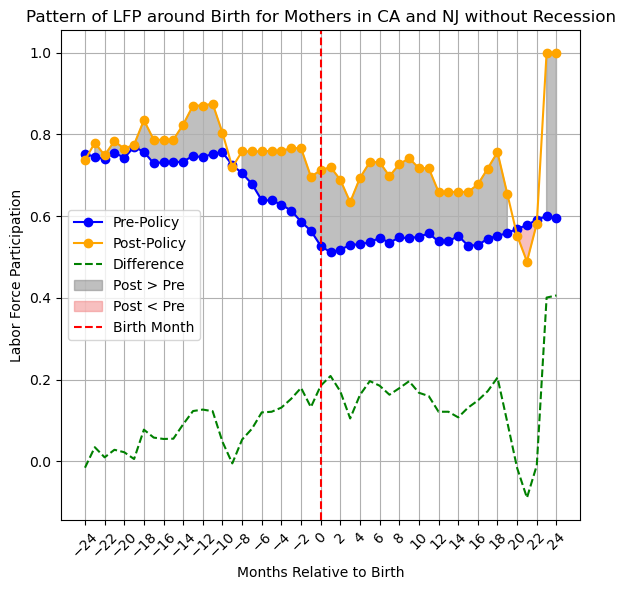

In [71]:
plt.figure(figsize=(6, 6))

# Plot Pre-Policy
plt.plot(results_df['Month'], results_df['Pre_Policy'], label='Pre-Policy', color='blue', marker='o')
# Plot Post-Policy
plt.plot(results_df['Month'], results_df['Post_Policy'], label='Post-Policy', color='orange', marker='o')
# Plot Difference
plt.plot(results_df['Month'], results_df['Difference'], label='Difference', color='green', linestyle='--')

# Adding labels and title
# Adding labels and title
plt.fill_between(results_df['Month'], results_df['Pre_Policy'], results_df['Post_Policy'],
                 where=(results_df['Post_Policy'] > results_df['Pre_Policy']),
                 color='gray', alpha=0.5, label='Post > Pre')

# Add shaded area where Post < Pre
plt.fill_between(results_df['Month'], results_df['Pre_Policy'], results_df['Post_Policy'],
                 where=(results_df['Post_Policy'] < results_df['Pre_Policy']),
                 color='lightcoral', alpha=0.5, label='Post < Pre')


plt.axvline(0, color='red', linestyle='--', label='Birth Month')
plt.title('Pattern of LFP around Birth for Mothers in CA and NJ without Recession')
plt.xlabel('Months Relative to Birth')
plt.ylabel('Labor Force Participation')
plt.xticks(np.arange(-24, 25, 2),rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [173]:
# Create an empty DataFrame to store results
results_df = pd.DataFrame({
    'Month': months
})

# Pre-Policy Estimates with Recession
pre_policy_estimates = np.zeros(len(months))  # Initialize with zeros
for i in range(1, 50):  # Assuming coefficients are from _IBirth_1 to _IBirth_51
    if i <= len(b_X_no_policy_recession):  # Check if index is within bounds
        pre_policy_estimates[i-1] = b_X_no_policy_recession.loc[b_X_no_policy_recession['Index'] == i, 'Estimate'].values[0]

# Post-Policy Estimates with Recession
post_policy_estimates = np.zeros(len(months))  # Initialize with zeros
for i in range(1, 50):  # Assuming coefficients are from _IBirth_1 to _IBirth_51
    if i <= len(b_X_with_policy_recession):  # Check if index is within bounds
        post_policy_estimates[i-1] = b_X_with_policy_recession.loc[b_X_with_policy_recession['Index'] == i, 'Estimate'].values[0]

# Assign the estimates to the DataFrame
results_df['Pre_Policy'] = pre_policy_estimates
results_df['Post_Policy'] = post_policy_estimates

# Calculate the difference
results_df['Difference'] = results_df['Post_Policy'] - results_df['Pre_Policy']

# Now, results_df should be correctly populated
print(results_df)  # Check the populated DataFrame


    Month  Pre_Policy  Post_Policy  Difference
0     -24    0.730596     0.764141    0.033545
1     -23    0.729545     0.766235    0.036690
2     -22    0.708099     0.766586    0.058488
3     -21    0.717472     0.762607    0.045134
4     -20    0.714548     0.758876    0.044328
5     -19    0.738113     0.749844    0.011732
6     -18    0.744811     0.727314   -0.017497
7     -17    0.719929     0.749143    0.029213
8     -16    0.732309     0.736805    0.004495
9     -15    0.731153     0.753784    0.022631
10    -14    0.737382     0.762325    0.024943
11    -13    0.753681     0.745498   -0.008183
12    -12    0.757104     0.771478    0.014375
13    -11    0.772099     0.768932   -0.003167
14    -10    0.775173     0.761526   -0.013647
15     -9    0.743499     0.728512   -0.014988
16     -8    0.717700     0.704421   -0.013279
17     -7    0.696727     0.692476   -0.004251
18     -6    0.644829     0.677366    0.032537
19     -5    0.641747     0.674710    0.032963
20     -4    

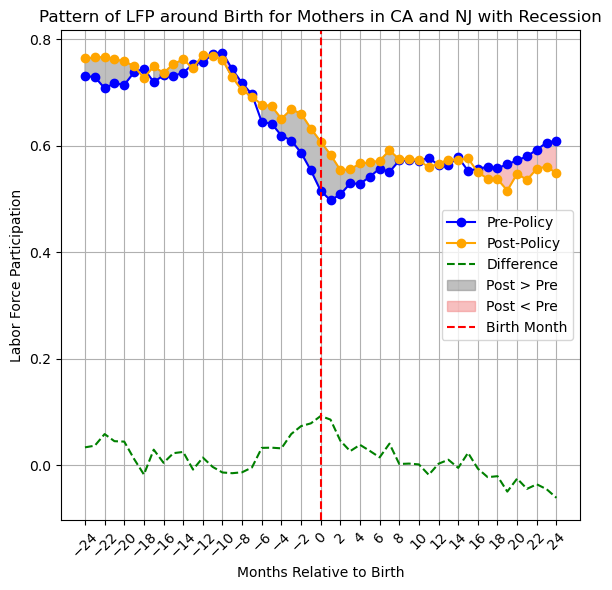

In [182]:
plt.figure(figsize=(6, 6))

# Plot Pre-Policy
plt.plot(results_df['Month'], results_df['Pre_Policy'], label='Pre-Policy', color='blue', marker='o')
# Plot Post-Policy
plt.plot(results_df['Month'], results_df['Post_Policy'], label='Post-Policy', color='orange', marker='o')
# Plot Difference
plt.plot(results_df['Month'], results_df['Difference'], label='Difference', color='green', linestyle='--')

# Adding labels and title
# Adding labels and title
plt.fill_between(results_df['Month'], results_df['Pre_Policy'], results_df['Post_Policy'],
                 where=(results_df['Post_Policy'] > results_df['Pre_Policy']),
                 color='gray', alpha=0.5, label='Post > Pre')

# Add shaded area where Post < Pre
plt.fill_between(results_df['Month'], results_df['Pre_Policy'], results_df['Post_Policy'],
                 where=(results_df['Post_Policy'] < results_df['Pre_Policy']),
                 color='lightcoral', alpha=0.5, label='Post < Pre')

plt.axvline(0, color='red', linestyle='--', label='Birth Month')
plt.title('Pattern of LFP around Birth for Mothers in CA and NJ with Recession')
plt.xlabel('Months Relative to Birth')
plt.ylabel('Labor Force Participation')
plt.xticks(np.arange(-24, 25, 2),rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()